信息可视化（也叫绘图）是数据分析中最重要的工作之一。它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化也许是工作的最终目标。Python有许多库进行静态或动态的数据可视化，但我这里重要关注于matplotlib（http://matplotlib.org/）和基于它的库。

In [29]:
import numpy as np
import pandas as pd

In [8]:
%matplotlib notebook

## 9.1 matplotlib API入门

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


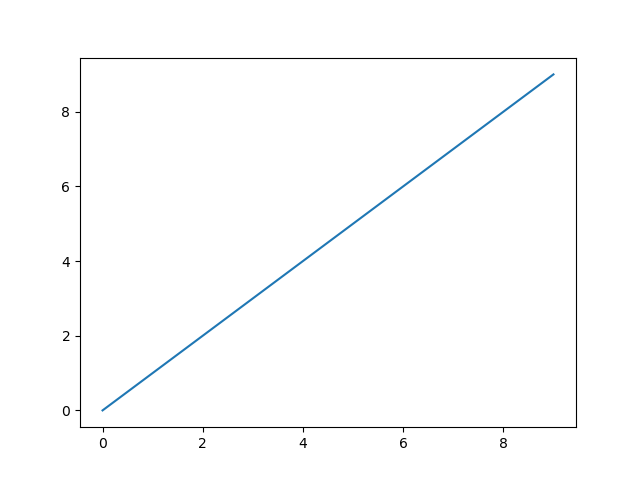

In [6]:
plt.plot(data)

虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API。

### Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

<IPython.core.display.Javascript object>


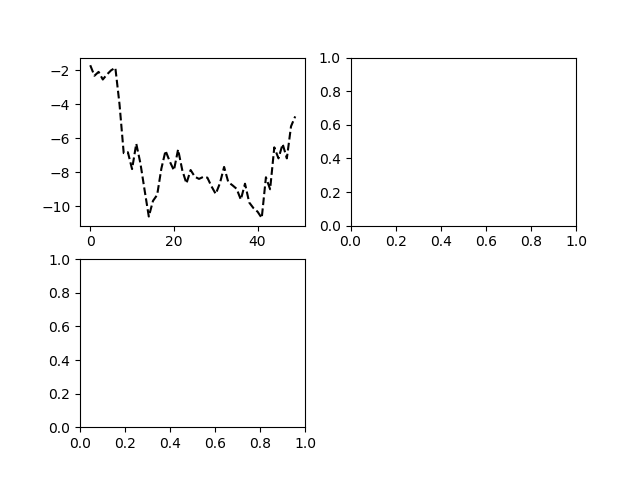

In [9]:
fig = plt.figure()

In [16]:
ax1 = fig.add_subplot(2, 2, 1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来，最终得到的图像如图9-2所示：

In [11]:
ax2 = fig.add_subplot(2, 2, 2)

In [12]:
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


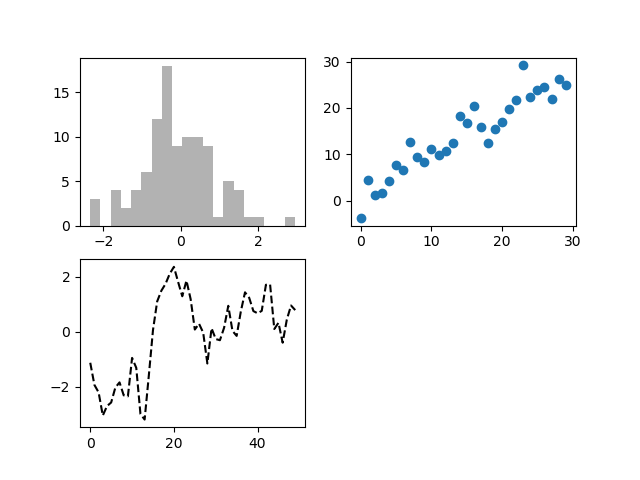

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [19]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了，如图9-4所示：

In [20]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 3.,  0.,  4.,  2.,  4.,  6., 12., 18.,  9., 10., 10.,  9.,  1.,
         5.,  4.,  1.,  1.,  0.,  0.,  1.]),
 array([-2.33657423, -2.07157738, -1.80658054, -1.54158369, -1.27658684,
        -1.01159   , -0.74659315, -0.48159631, -0.21659946,  0.04839738,
         0.31339423,  0.57839108,  0.84338792,  1.10838477,  1.37338161,
         1.63837846,  1.9033753 ,  2.16837215,  2.43336899,  2.69836584,
         2.96336269]),
 <a list of 20 Patch objects>)

In [21]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

<IPython.core.display.Javascript object>


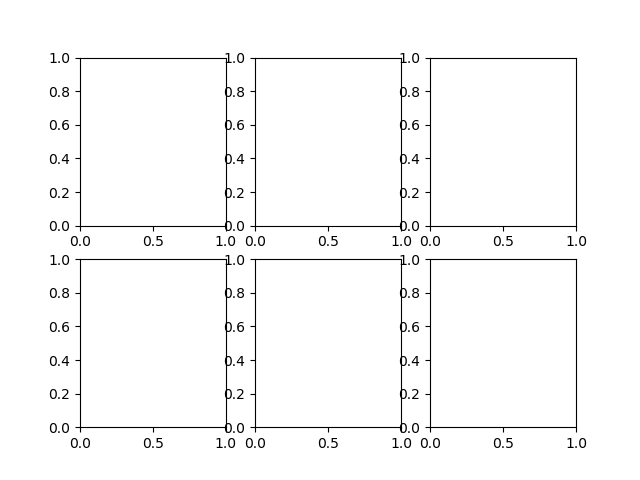

In [22]:
fig, axes = plt.subplots(2, 3)

In [23]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACA5BDA160>,
      dtype=object)

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。有关该方法的更多信息，请参见表9-1。

## 调整subplot周围的间距

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：

In [32]:
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

NameError: name 'subplots_adjust' is not defined

<IPython.core.display.Javascript object>


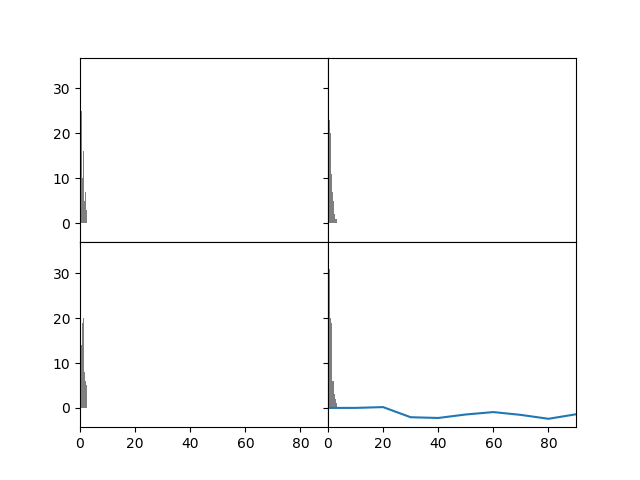

In [33]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该内容。

## 颜色、标记和线型

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：

In [34]:
ax.plot(x, y, 'g--')

NameError: name 'ax' is not defined

# 9.2 使用pandas和seaborn绘图

matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。
在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

## 线型图

Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图（如图9-13所示）：

In [35]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [36]:
s.plot()